# 간단한 신경망 학습해보기

In [1]:
## CIFAR10 데이터셋 불러오기
## torchvision의 데이터셋은 0~1 값을 가지는 PIL Image 객체
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
# 데이터셋을 텐서로 변환하고 -1~ 1값을 가질 수 있도록 normalize한다.

transform = transforms.Compose(
                            [transforms.ToTensor(),
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
     
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
					download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
					shuffle=True, num_workers=2)
                                            
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
					download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
					shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


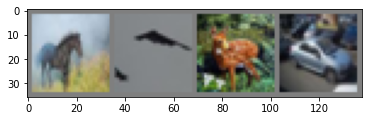

horse plane  deer   car


In [6]:
## 이미지로드 함수를 통해 학습 이미지 확인

import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주는 함수

def imshow(img):
    img = img / 2 + 0.5 # unnormalize 0~1 값
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# 임의의 학습용 이미지 얻기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 출력
imshow(torchvision.utils.make_grid(images))
# 레이블 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
## 신경망 정의

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 channel image 받기
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
net = Net()

In [9]:
## 손실함수와 optimizer 정의

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
## 신경망 학습하기

for epoch in range(10): # 여러번 데이터셋 반복하기

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력값을 얻습니다. 데이타는 [입력값, 레이블]의 목록입니다.
        inputs, labels = data
        
        # 매개변수 변화도를 0으로 만듭니다.
        optimizer.zero_grad()
        
        # 순전파 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 결과 출력
        running_loss += loss.item()
        if i % 2000 == 1999: # 매 2000번 미니배치마다 출력하기
            print('[%d, %5d] loss: %.3f' %
                  (epoch +1, i+1, running_loss / 2000))
            running_loss =0.0
            
print('Finished Training')

[1,  2000] loss: 2.179
[1,  4000] loss: 1.849
[1,  6000] loss: 1.658
[1,  8000] loss: 1.550
[1, 10000] loss: 1.496
[1, 12000] loss: 1.449
[2,  2000] loss: 1.375
[2,  4000] loss: 1.335
[2,  6000] loss: 1.324
[2,  8000] loss: 1.289
[2, 10000] loss: 1.280
[2, 12000] loss: 1.270
[3,  2000] loss: 1.201
[3,  4000] loss: 1.198
[3,  6000] loss: 1.170
[3,  8000] loss: 1.159
[3, 10000] loss: 1.170
[3, 12000] loss: 1.159
[4,  2000] loss: 1.071
[4,  4000] loss: 1.065
[4,  6000] loss: 1.092
[4,  8000] loss: 1.098
[4, 10000] loss: 1.076
[4, 12000] loss: 1.096
[5,  2000] loss: 0.994
[5,  4000] loss: 1.022
[5,  6000] loss: 0.992
[5,  8000] loss: 1.021
[5, 10000] loss: 1.043
[5, 12000] loss: 1.035
[6,  2000] loss: 0.930
[6,  4000] loss: 0.944
[6,  6000] loss: 0.968
[6,  8000] loss: 0.964
[6, 10000] loss: 0.970
[6, 12000] loss: 0.992
[7,  2000] loss: 0.890
[7,  4000] loss: 0.917
[7,  6000] loss: 0.931
[7,  8000] loss: 0.914
[7, 10000] loss: 0.921
[7, 12000] loss: 0.940
[8,  2000] loss: 0.843
[8,  4000] 

In [12]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

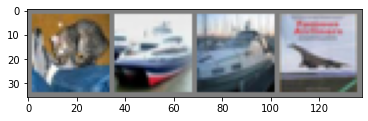

GroundTruth:    cat  ship  ship plane


In [13]:
## 신경망 테스트 하기

dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지 출력하기
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
## 모델 불러오는 법

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [15]:
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted : ', ' '.join('%5s' % classes[predicted[j]]
                             for j in range(4)))

Predicted :    cat  ship  ship plane


In [17]:
## 테스트 셋 동작

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (
      100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [20]:
## 각 class마다 평가

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuract of %5s : %2d %%' %(
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuract of plane : 68 %
Accuract of   car : 71 %
Accuract of  bird : 44 %
Accuract of   cat : 39 %
Accuract of  deer : 68 %
Accuract of   dog : 40 %
Accuract of  frog : 69 %
Accuract of horse : 70 %
Accuract of  ship : 84 %
Accuract of truck : 69 %
